In [1]:
import pandas as pd
import numpy as np

# Resample

In [2]:
df_resample = pd.read_csv("resample.csv")

In [3]:
df_resample['review_content'] = df_resample['review_content'].astype(str)

# Compare different models' accuracy - All Category

In [4]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split

## bag of words

In [5]:
bog = CountVectorizer(ngram_range=(1,2))
feature = bog.fit_transform(df_resample.review_content)
label = df_resample.Label
feature_train,feature_test,label_train,label_test= train_test_split(feature,label,test_size= 0.2, random_state = 0, stratify = label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 LR  Train Accuracy: 0.9875284676282399 , Test Accuracy: 0.8584441873915558 , Test AUC Score: 0.8584339525758471

Confusion Matrix : 
 [[2989  481]
 [ 498 2948]]

Top 20 features with smallest coefficients :
['disappointed' 'terrible' 'boring' 'disappointing' 'horrible' 'poor'
 'damaged' 'worst' 'waste' 'not very' 'not' 'not worth' 'missing'
 'returned' 'awful' 'garbage' 'not good' 'didn' 'cheap' 'poorly']

Top 20 features with largest coefficients : 
['excellent' 'beautiful' 'great' 'fun' 'awesome' 'amazing' 'perfect'
 'fantastic' 'wonderful' 'fascinating' 'loves' 'best book' 'not bad'
 'love this' 'love' 'enjoyed' 'loved' 'trevor' 'very interesting' 'nice']

 MNB  Train Accuracy: 0.9664895347576185 , Test Accuracy: 0.8622035858877964 , Test AUC Score: 0.8621582722983336

Confusion Matrix : 
 [[3037  433]
 [ 520 2926]]

 RF  Train Accuracy: 0.9986986227090338 , Test Accuracy: 0.8264893001735107 , Test AUC Score: 0.8263125939777314

Confusion Matrix : 
 [[3044  426]
 [ 774 2672]]


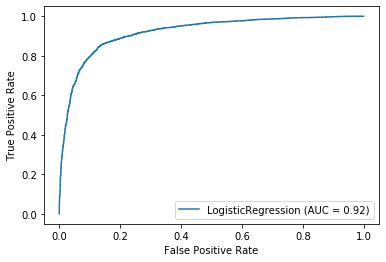

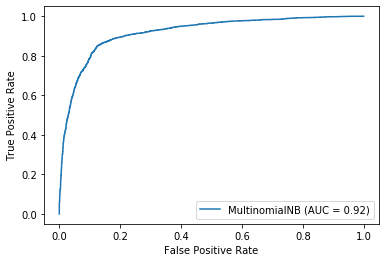

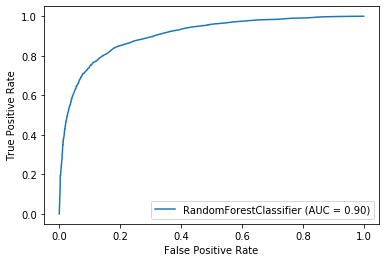

In [6]:
models = []
models.append(('LR', LogisticRegression(C = 0.35)))
models.append(('MNB', MultinomialNB())) 
models.append(('RF',RandomForestClassifier()))
for name, model in models:
    model.fit(feature_train, label_train)
    preds_train = model.predict(feature_train)
    preds_test = model.predict(feature_test)
    (train_score, test_score, AUC_score) = (accuracy_score(label_train, preds_train), accuracy_score(label_test, preds_test),roc_auc_score(label_test, preds_test))
    print('\n', name, " Train Accuracy:", train_score, ", Test Accuracy:", test_score, ", Test AUC Score:", AUC_score)
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(label_test, preds_test))
    plot_roc_curve(model, feature_test,label_test)
    if name == 'LR':
        feature_names = np.array(bog.get_feature_names())
        sorted_coef_index = model.coef_[0].argsort()
        print('\nTop 20 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:20]]))
        print('Top 20 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-21:-1]]))

## TFIDF

In [7]:
tfidf = TfidfVectorizer(ngram_range=(1,2), sublinear_tf = True)
feature = tfidf.fit_transform(df_resample.review_content)
label = df_resample.Label
feature_train,feature_test,label_train,label_test= train_test_split(feature,label,test_size= 0.20, random_state = 0, stratify = label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 LR  Train Accuracy: 0.9754907276868019 , Test Accuracy: 0.8591671486408329 , Test AUC Score: 0.8591132683594228
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3470
           1       0.87      0.84      0.86      3446

    accuracy                           0.86      6916
   macro avg       0.86      0.86      0.86      6916
weighted avg       0.86      0.86      0.86      6916


Confusion Matrix : 
 [[3035  435]
 [ 539 2907]]

Top 20 features with smallest coefficients :
['not' 'disappointed' 'didn' 'boring' 'terrible' 'waste' 'disappointing'
 'nothing' 'poor' 'pages' 'too' 'worst' 'horrible' 'no' 'reviews' 'don'
 'very disappointed' 'instead' 'at all' 'damaged']

Top 20 features with largest coefficients : 
['great' 'love' 'amazing' 'fun' 'beautiful' 'excellent' 'perfect'
 'awesome' 'life' 'wonderful' 'loved' 'enjoyed' 'read' 'loves' 'my'
 'the best' 'best' 'fantastic' 'love this' 'good']

 MNB  Train Accuracy: 0.951053754111

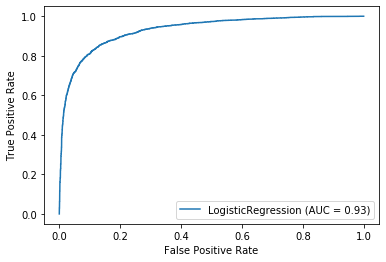

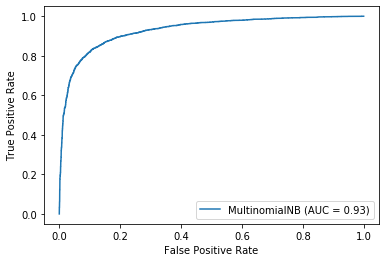

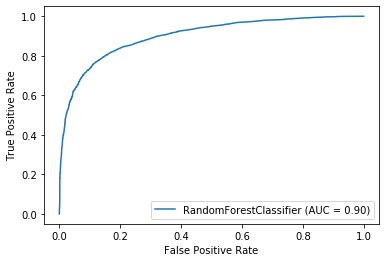

In [9]:
models = []
models.append(('LR', LogisticRegression(C = 3.5)))
models.append(('MNB', MultinomialNB())) 
models.append(('RF',RandomForestClassifier()))
for name, model in models:
    model.fit(feature_train, label_train)
    preds_train = model.predict(feature_train)
    preds_test = model.predict(feature_test)
    (train_score, test_score, AUC_score) = (accuracy_score(label_train, preds_train), accuracy_score(label_test, preds_test),roc_auc_score(label_test, preds_test))
    print('\n', name, " Train Accuracy:", train_score, ", Test Accuracy:", test_score, ", Test AUC Score:", AUC_score)
    print(metrics.classification_report(label_test, preds_test))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(label_test, preds_test))
    plot_roc_curve(model, feature_test,label_test)
    if name == 'LR':
        feature_names = np.array(bog.get_feature_names())
        sorted_coef_index = model.coef_[0].argsort()
        print('\nTop 20 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:20]]))
        print('Top 20 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-21:-1]]))